In [110]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [111]:
# Importation du fichier villes.csv
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

In [112]:
# On transforme la matrice pour avoir des données centrées réduites

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

stdScal = StandardScaler()
stdScal.fit(X)
X_norm = stdScal.transform(X)

acp = PCA(n_components=2)
acp.fit(X_norm)
X_pca = acp.transform(X_norm)

In [113]:
# Question 1

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
kmeans.predict
clustering = kmeans.labels_

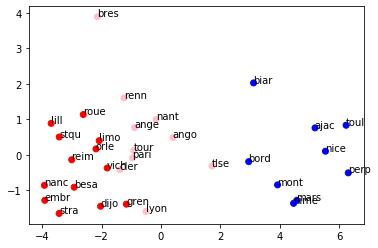

In [114]:
import matplotlib

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

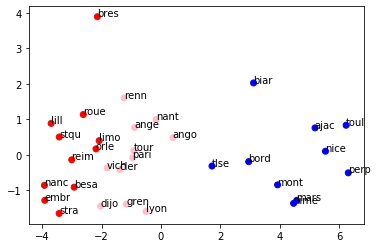

In [115]:
# Question 2

from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(linkage="ward", n_clusters=3)
agc.fit(X_pca)
clustering = agc.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

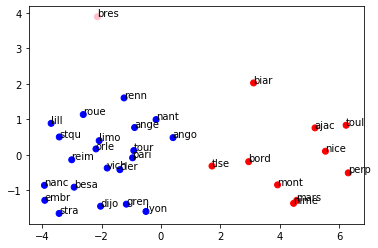

In [116]:
agc = AgglomerativeClustering(linkage="average", n_clusters=3)
agc.fit(X_pca)
clustering = agc.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

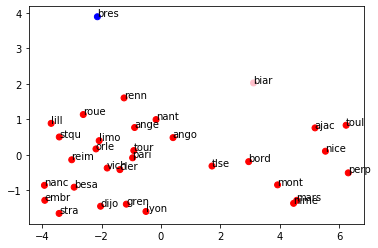

In [117]:
agc = AgglomerativeClustering(linkage="single", n_clusters=3)
agc.fit(X_pca)
clustering = agc.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Avec 2 groupe, le silhouette_score est de : 0.6341345030494504
Avec 3 groupe, le silhouette_score est de : 0.40123525587485687
Avec 4 groupe, le silhouette_score est de : 0.3804988852195481
Avec 5 groupe, le silhouette_score est de : 0.34588697677090047
Avec 6 groupe, le silhouette_score est de : 0.3134882501801475


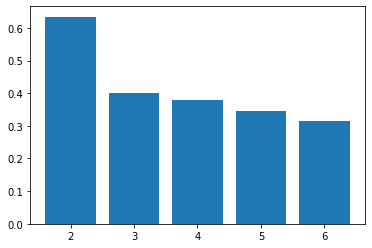

In [136]:
# Question 3

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

scores = []
list_n_clusters = range(2,7)

for n_clusters in list_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X_pca)

    silScore = silhouette_score(X_pca, labels)
    scores.append(silScore)
    print("Avec", n_clusters, "groupe, le silhouette_score est de :", silScore)

plt.bar(list_n_clusters, scores)
plt.show()

Avec 2 groupe, le silhouette_score est de : 0.6341345030494504
Avec 3 groupe, le silhouette_score est de : 0.381537398981024
Avec 4 groupe, le silhouette_score est de : 0.397148428850604
Avec 5 groupe, le silhouette_score est de : 0.34551245887931764
Avec 6 groupe, le silhouette_score est de : 0.3390578944927679


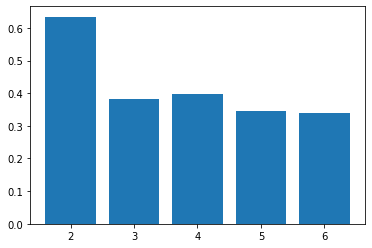

In [138]:
# Question 4

scores = []

for n_clusters in list_n_clusters:
    agc = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = agc.fit_predict(X_pca)

    silScore = silhouette_score(X_pca, labels)
    scores.append(silScore)
    print("Avec", n_clusters, "groupe, le silhouette_score est de :", silScore)

plt.bar(list_n_clusters, scores)
plt.show()

Avec 2 groupe, le silhouette_score est de : 0.6341345030494504
Avec 3 groupe, le silhouette_score est de : 0.5067547529956746
Avec 4 groupe, le silhouette_score est de : 0.4128086230188496
Avec 5 groupe, le silhouette_score est de : 0.3528957440943905
Avec 6 groupe, le silhouette_score est de : 0.33198554204098685


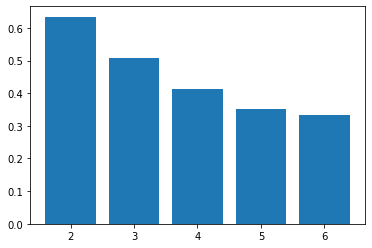

In [140]:
scores = []

for n_clusters in list_n_clusters:
    agc = AgglomerativeClustering(n_clusters=n_clusters, linkage="average")
    labels = agc.fit_predict(X_pca)

    silScore = silhouette_score(X_pca, labels)
    scores.append(silScore)
    print("Avec", n_clusters, "groupe, le silhouette_score est de :", silScore)

plt.bar(list_n_clusters, scores)
plt.show()

Avec 2 groupe, le silhouette_score est de : 0.18399880470222812
Avec 3 groupe, le silhouette_score est de : -0.031653255100035756
Avec 4 groupe, le silhouette_score est de : 0.1917961254123293
Avec 5 groupe, le silhouette_score est de : 0.42394951020270666
Avec 6 groupe, le silhouette_score est de : 0.3358347913161447


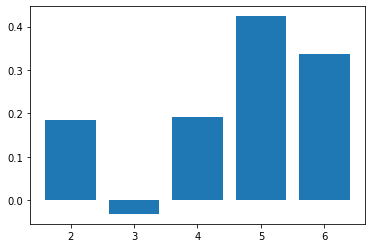

In [141]:
scores = []

for n_clusters in list_n_clusters:
    agc = AgglomerativeClustering(n_clusters=n_clusters, linkage="single")
    labels = agc.fit_predict(X_pca)

    silScore = silhouette_score(X_pca, labels)
    scores.append(silScore)
    print("Avec", n_clusters, "groupe, le silhouette_score est de :", silScore)

plt.bar(list_n_clusters, scores)
plt.show()

In [142]:
# Question 5
# La méthode donnant la meilleure partition avec 3 cluster est la méthode de clustering hiérarhique avec la méthode average

0.5067547529956746

In [ ]:
# Question 6
# La méthode k-means possède les inconvénients suivants : le nombre de classe optimal doit être déterminé avant le lancement de
# l'algorithme. En effet, il y a des risques de perte de classe lors d'un choix trop grand, ou de perturbation des groupes par
# des données éloignés avec un nombre trop petit. K-means est aussi dépendant de son initialisation. Il obtient des groupes
# différents en fonction des centres donnés au début.
# L'algorithme k-means possède aussi des avantages : il est simple et rapide. Ilest aussi adaptable a un grand nombre de
# données : sa complexité temporelle est linéaire. Enfin, les résultats sont simples à analyser.

# La classification hierarchique possède aussi des désavantages : elle est demandante en ressource, donc très longue à utiliser
# sur de grands volumes de donnés. De plus, la méthode type single-link aura tendance à grouper deux clusters adjacents si
# leurs éléments sont trop proches
# Les avantages sont les suivants : permet de connaitre les données similaires entre elle plutôt que le groupe auquel
# elles appartiennent